<a href="https://colab.research.google.com/github/Amulya-k-2002/Customer_segmentation_mini_project/blob/main/tips(data_analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BUSINESS PROBLEM**
Analyzing the Customer inflow of a restaurant and drawing the necessary inferences'




In [1]:
# importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
# setting the theme

sns.set_theme(style="whitegrid")

In [6]:
# loading the dataset from seaborn library
tip=sns.load_dataset("tips")
tip.sample(5)


,total_bill,tip,sex,smoker,day,time,size
112,38.07,4.00,Male,No,Sun,Dinner,3
227,20.45,3.00,Male,No,Sat,Dinner,4
217,11.59,1.50,Male,Yes,Sat,Dinner,2
220,12.16,2.20,Male,Yes,Fri,Lunch,2
48,28.55,2.05,Male,No,Sun,Dinner,3


# **UNDERSTANDING THE DATA**

In [7]:
tip.shape

(244, 7)

In [8]:
tip.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [9]:
tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [10]:
tip.isnull().sum()*100

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

<Axes: >

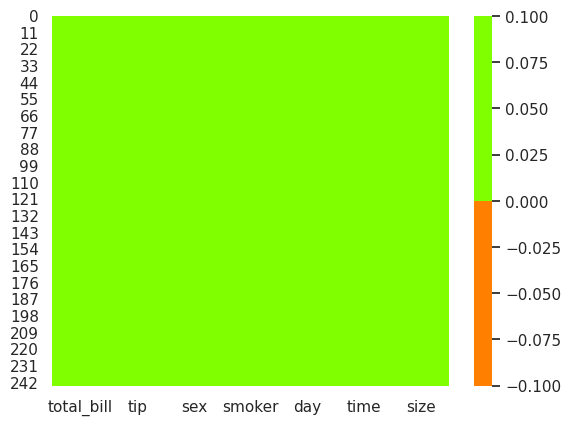

In [12]:
cols=tip.columns
color=["#ff8000","#80ff00"]
sns.heatmap(tip[cols].isnull(),cmap=sns.color_palette(color))


In [52]:
tip.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [15]:
tip.groupby(["sex","smoker","day"]).agg({"total_bill":["mean","min","max"]})

total_bill              
                         mean    min    max
sex    smoker day                          
Male   Yes    Thur  19.171000  10.34  32.68
              Fri   20.452500   8.58  40.17
              Sat   21.837778   7.74  50.81
              Sun   26.141333   7.25  45.35
       No     Thur  18.486500   7.51  41.19
              Fri   17.475000  12.46  22.49
              Sat   19.929063   9.55  48.33
              Sun   20.403256   8.77  48.17
Female Yes    Thur  19.218571  12.74  43.11
              Fri   12.654286   5.75  16.32
              Sat   20.266667   3.07  44.30
              Sun   16.540000   9.60  20.90
       No     Thur  16.014400   8.35  34.83
              Fri   19.365000  15.98  22.75
              Sat   19.003846   7.25  35.83
              Sun   20.824286  10.29  35.26

In [16]:
tip.groupby(["sex"]).agg({"tip":["mean","min","max"]})

tip           
            mean  min   max
sex                        
Male    3.089618  1.0  10.0
Female  2.833448  1.0   6.5

# **STATISTICAL OVERVIEW**

In [17]:
tip.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [20]:
table=tip.copy()
x=table.drop(columns=["total_bill","tip"])
y=table[["total_bill","size"]]

In [21]:
def dist(x,y):
  fig=plt.figure(figsize=(15,5))
  ax=fig.add_subplot(121)
  sns.histplot(x,ax=ax,kde=True,color="peru")
  ax.axvline(x.mean(),color="red",linestyle="-",linewidth=1.5)
  ax.axvline(x.median(),color="blue",linestyle="--",linewidth=1.5)
  ax.legend(labels=["kde","mean","median"])
  ax.set_title("kde plot")
  ax2=fig.add_subplot(122)
  sns.boxplot(x,ax=ax2,color="orchid")
  plt.show()


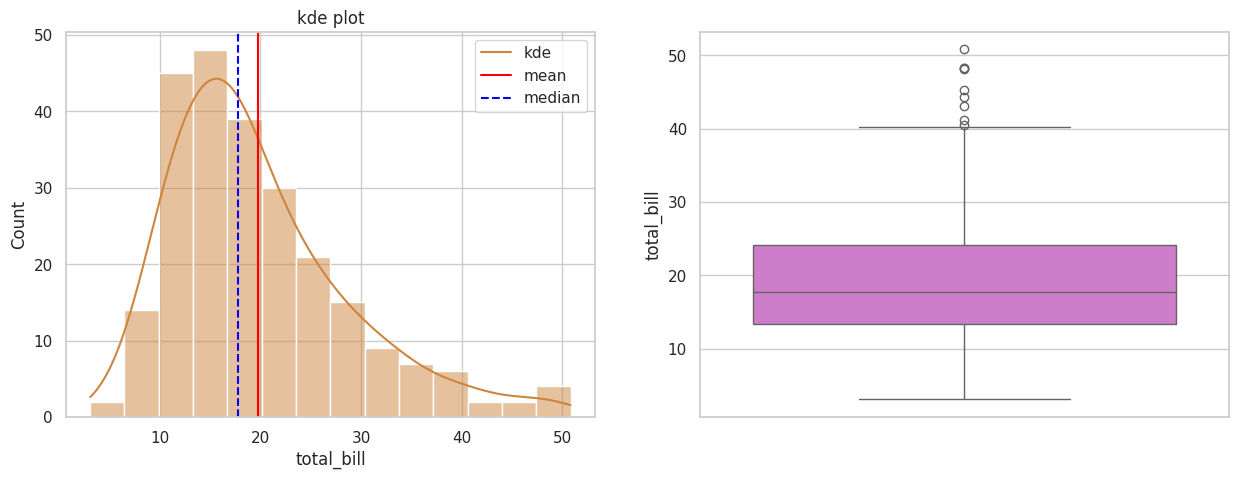

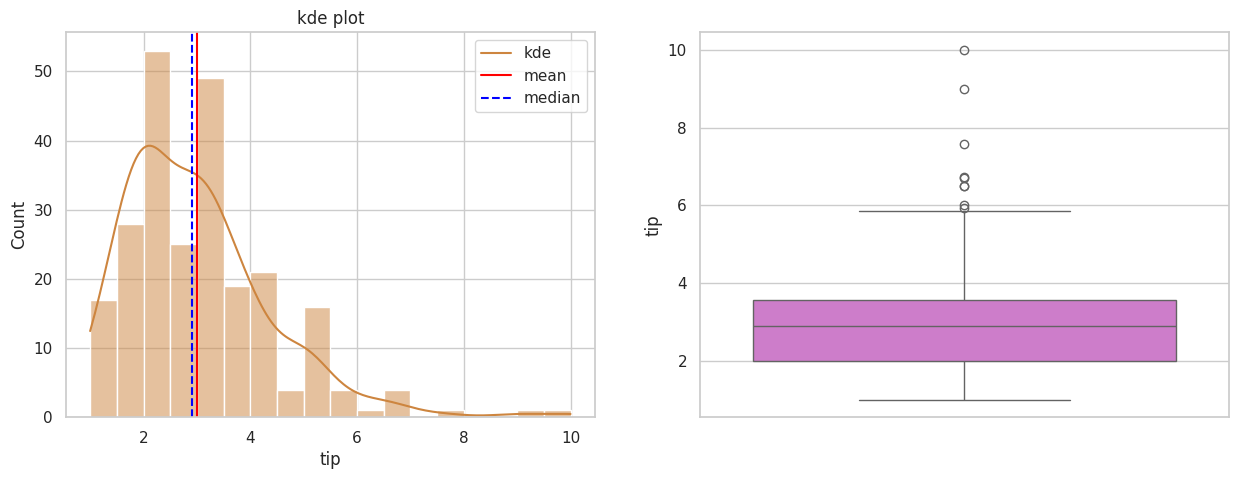

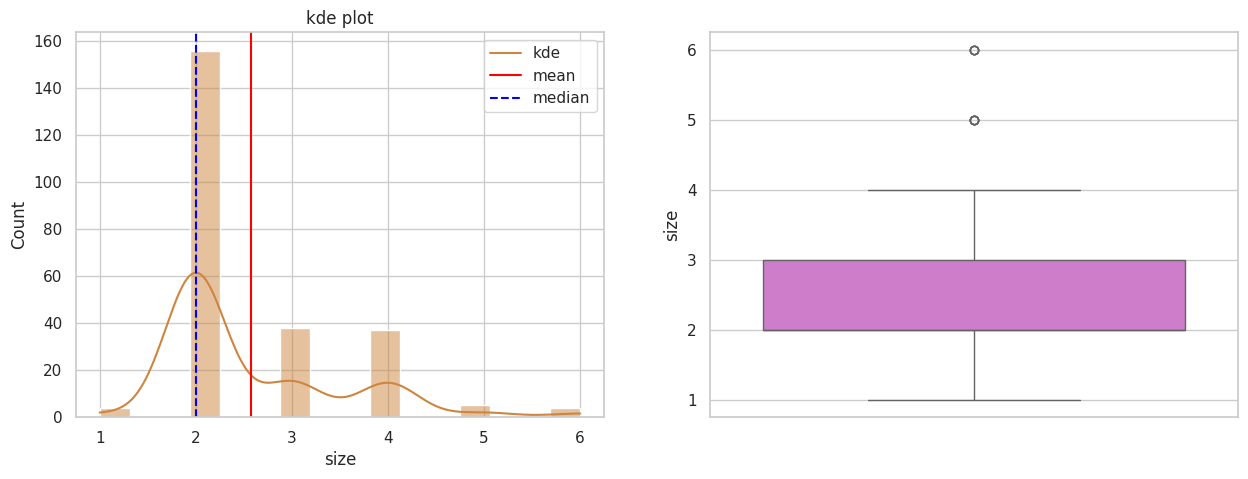

In [24]:
for i in list(table.select_dtypes(include=["number"]).columns):
  dist(table[i],i)
  plt.show()


# **DATA VISUALIZATION**

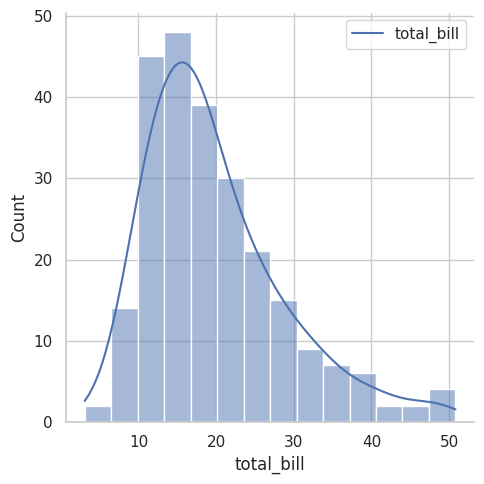

In [28]:

sns.displot(tip,x="total_bill",kde=True)
plt.legend(labels=["total_bill"])

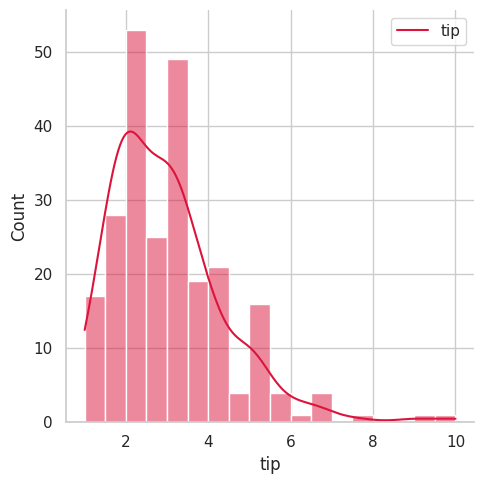

In [29]:
sns.displot(tip,x="tip",kde=True,color="crimson")
plt.legend(labels=["tip"])

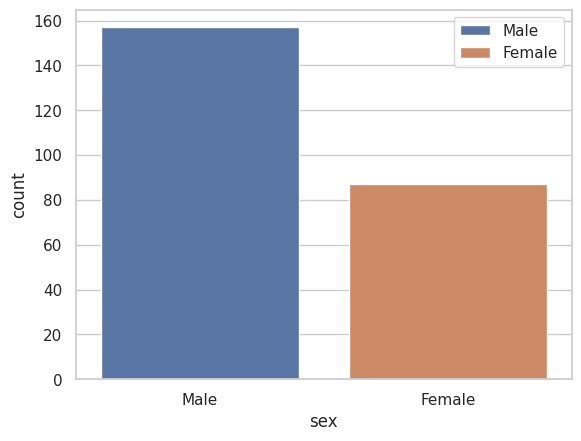

In [34]:
# univariate analysis
# visualizing the categorical data

sns.countplot(tip,x="sex",hue="sex")
plt.legend(labels=["Male","Female"])

In [35]:
a=tip["smoker"].value_counts()
percent=round(a/244*100,2)
percent

smoker
No     61.89
Yes    38.11
Name: count, dtype: float64

<Axes: ylabel='count'>

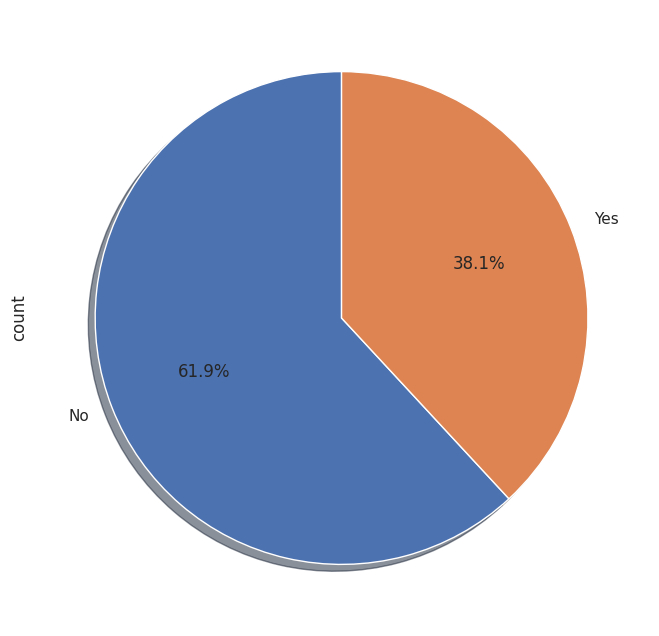

In [40]:

percent.plot(figsize=(10,8),kind="pie",autopct="%1.1f%%",shadow=True,startangle=90)


In [42]:
b=tip["size"].value_counts()
per=round(b/244*100)
per

size
2    64.0
3    16.0
4    15.0
5     2.0
1     2.0
6     2.0
Name: count, dtype: float64

<Axes: ylabel='count'>

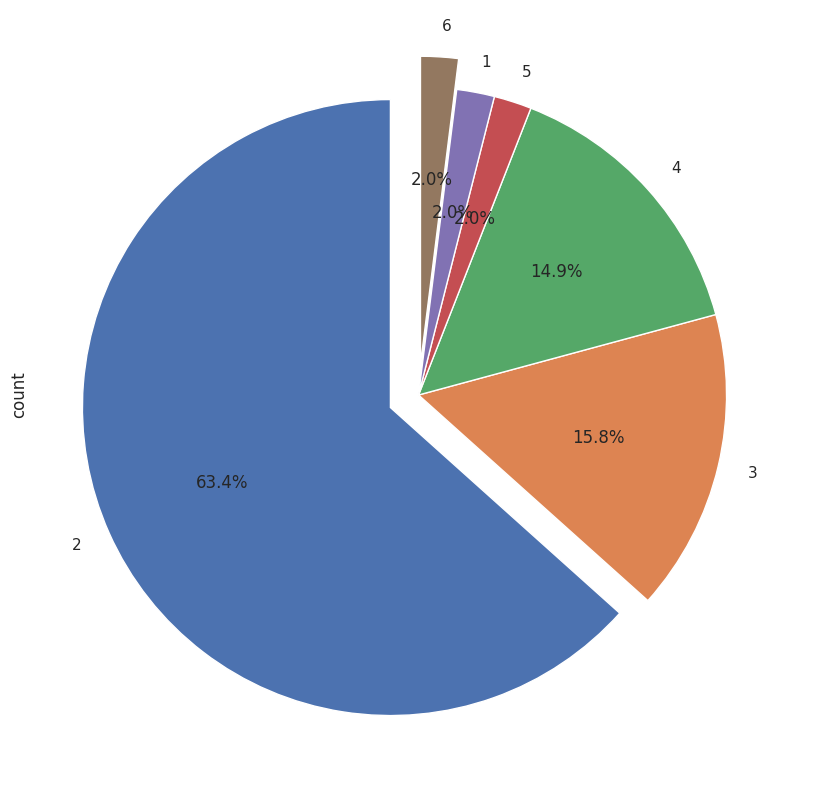

In [51]:
explode=[0.1,0,0,0,0,0.1]
per.plot(figsize=(10,10),kind="pie",explode=explode,startangle=90,autopct="%1.1f%%")

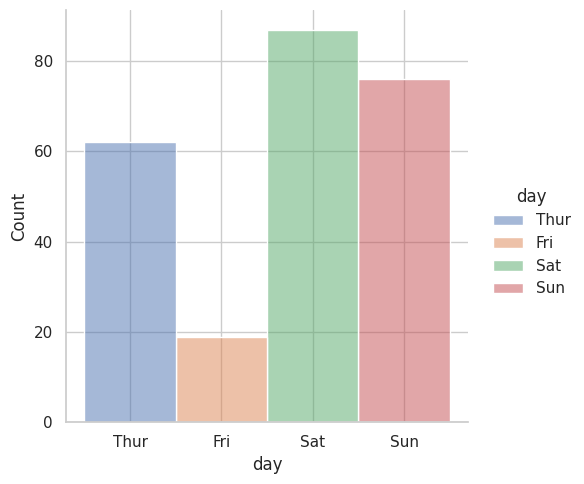

In [62]:
sns.displot(tip,x="day",hue="day")


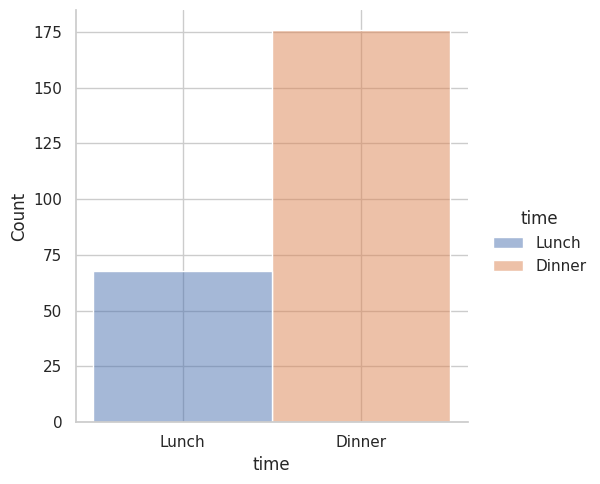

In [63]:
sns.displot(tip,x="time",hue="time")

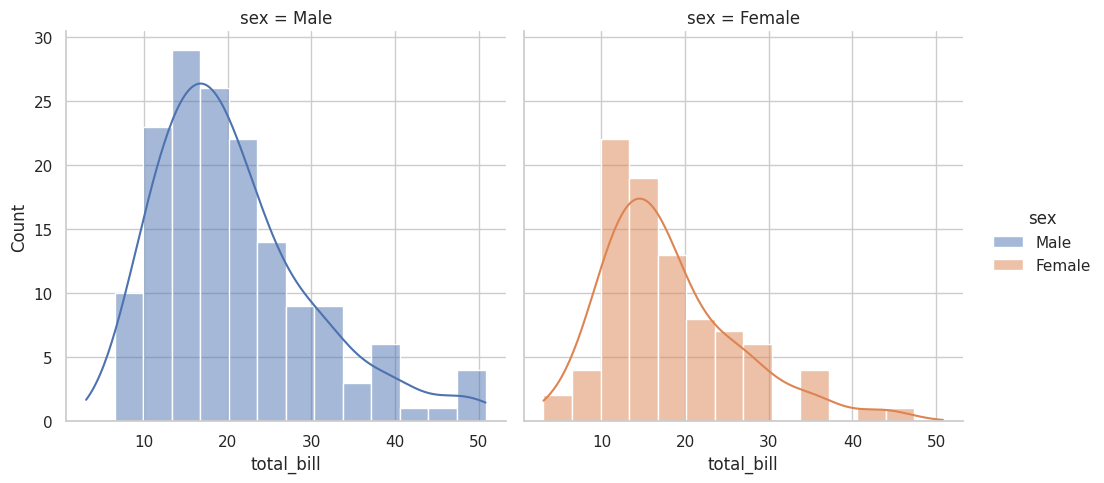

In [65]:
# Bivariate analysis

sns.displot(tip,x="total_bill",col="sex",hue="sex",kde=True)

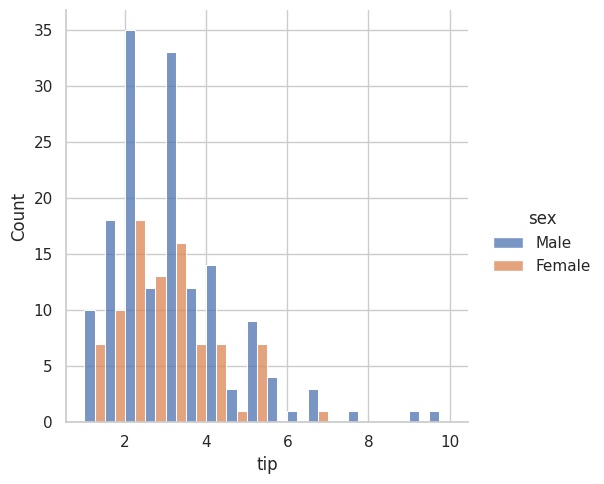

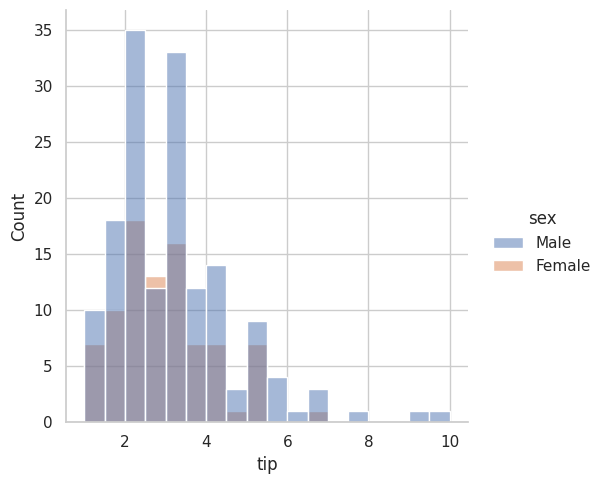

In [70]:
sns.displot(tip,x="tip",hue="sex",multiple="dodge")
sns.displot(tip,x="tip",hue="sex")

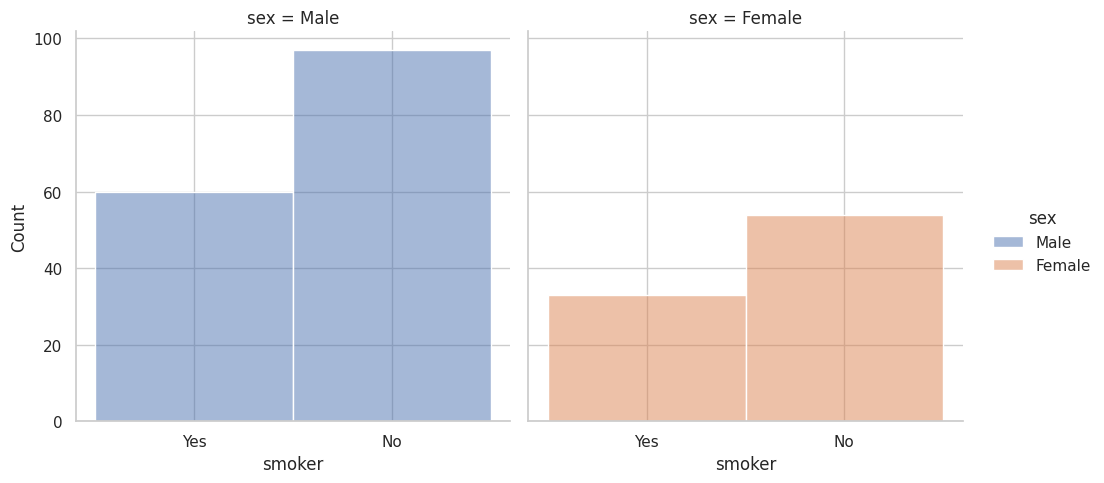

In [72]:
sns.displot(tip,x="smoker",col="sex",hue="sex")

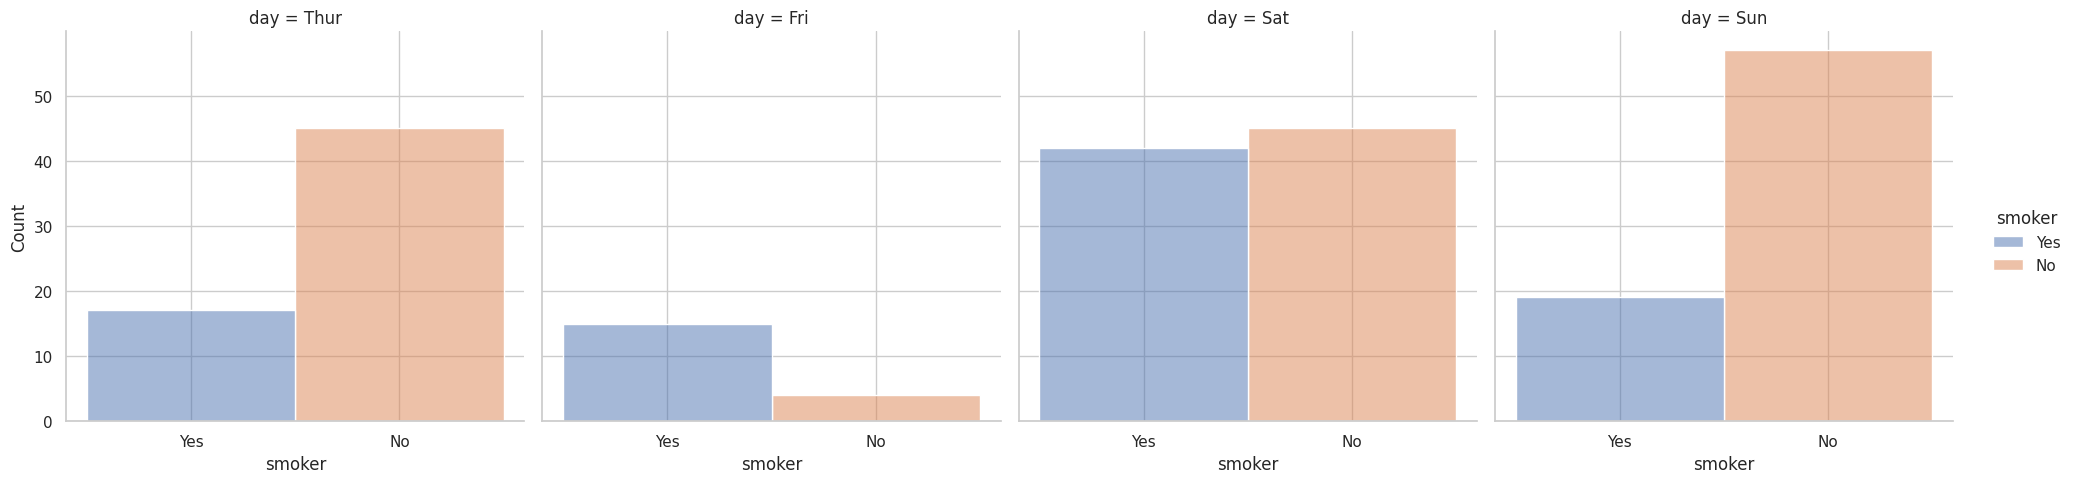

In [85]:
sns.displot(tip,x="smoker",col="day",hue="smoker")

<Axes: xlabel='day', ylabel='count'>

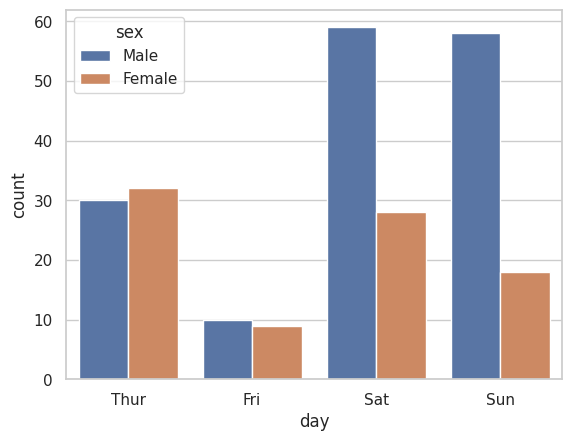

In [77]:
sns.countplot(tip,x="day",hue="sex")

<Axes: xlabel='time', ylabel='count'>

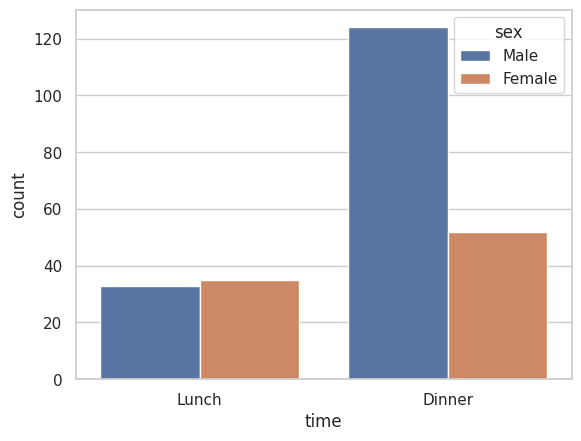

In [78]:
sns.countplot(tip,x="time",hue="sex")

<Axes: xlabel='total_bill', ylabel='tip'>

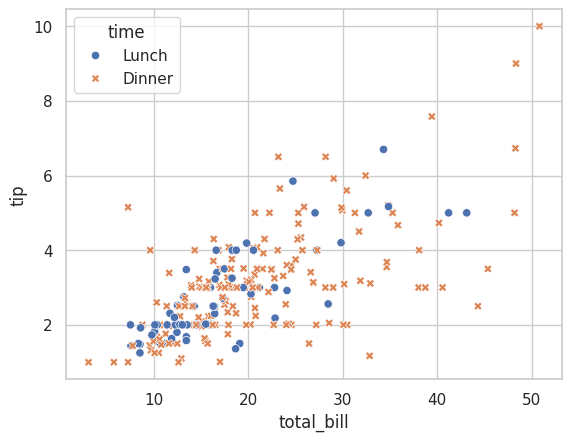

In [81]:
sns.scatterplot(tip,x="total_bill",y="tip",hue="time",style="time")

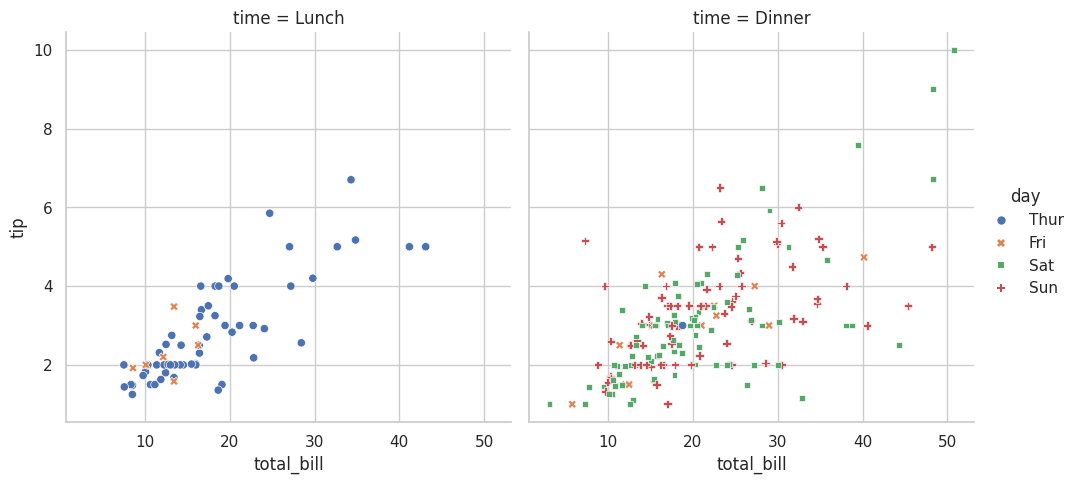

In [83]:
sns.relplot(
    data=tip,x="total_bill",y="tip",
    col="time",hue="day",style="day",
    kind="scatter"
)


# **INFERENCE**
* From the above visualizations we can infer few observations and weave a data story

* Male praportion is more than Female praportion
* amongst the customers , 38 % of them are smokers while 62 % of them are non-smokers . hence , most of the customers are non-smokers
* most of the customers prefer turning up for dinner on weekends (saturdays) than any other day . However  , female customers prefer having on thursdays
* We can understand the smoker - non smoker pattern through the visualizations .
* most of the smokers turn up on saturdays probably and most of them turn up in pair (2 size )
* while if we analyze the the total bill and tips pattern , both tips and total_bill are correlated to each other
* since the male customers praportion is more than that of female customer praportion , total bill and tips given by male customers is more than female customers